## <b>2 <span style='color:#e61227'>|</span> Install And Import Essential Libreries</b> 


In [1]:
# Install Essential Libraries
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.9/645.9 kB 9.2 MB/s eta 0:00:00a 0:00:01


In [2]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## <b>3 <span style='color:#e61227'>|</span> Dataset</b> 

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>3.1 |</span></b> Show Original Images Before Detect </b></p>
</div>

***3.1.1. Show Some Images From TrainSet***

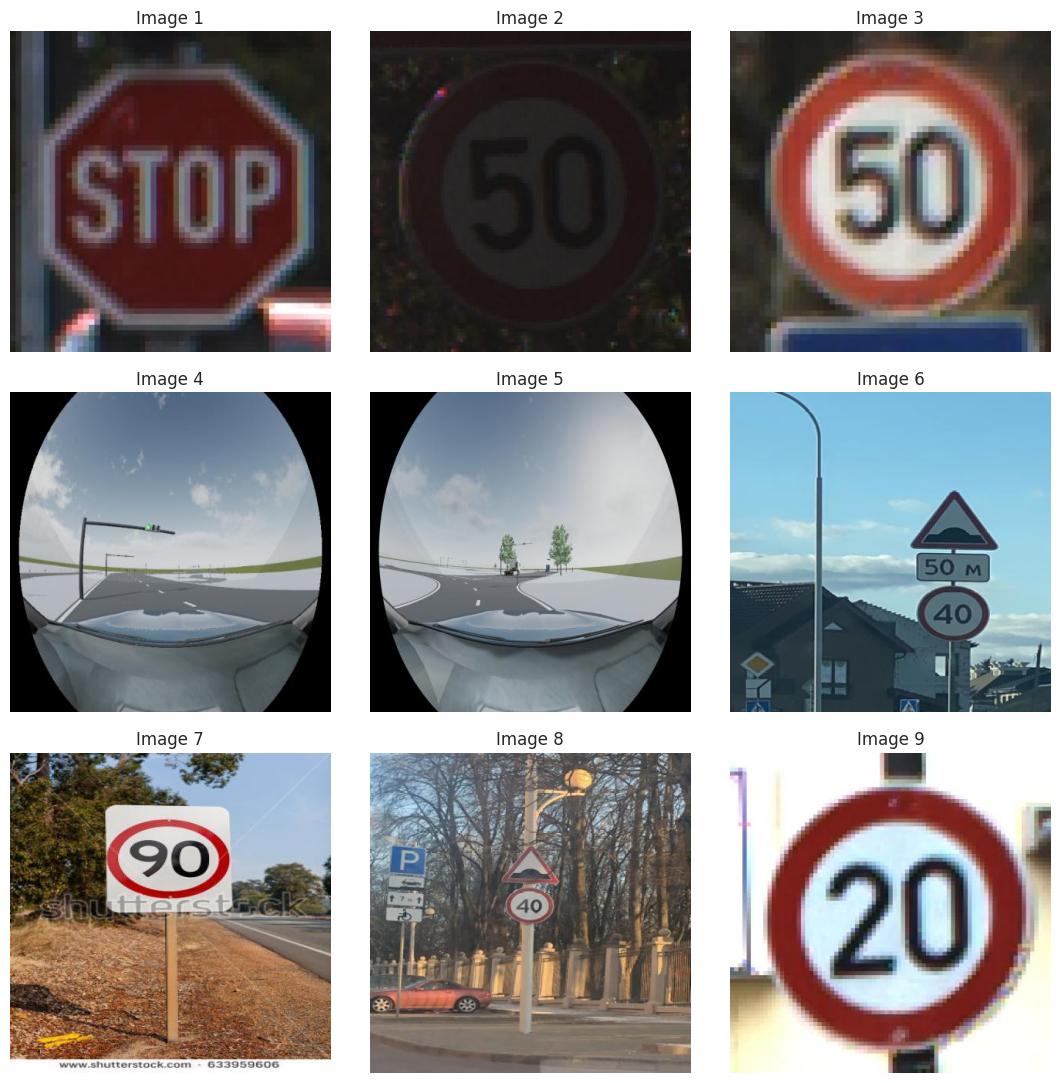

In [3]:
Image_dir = '/kaggle/input/cardetection/car/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

***3.1.2. Get Shape Of An Image For Using In Training Step***

In [4]:
# Get the size of the image
image = cv2.imread("/kaggle/input/cardetection/car/train/images/00000_00000_00012_png.rf.23f94508dba03ef2f8bd187da2ec9c26.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 416x416 and 3 channels.


## <b>4 <span style='color:#e61227'>|</span> Try Pre-trained YOLOv8 For Detect Traffic Signs  </b>

100%|██████████| 6.23M/6.23M [00:00<00:00, 70.6MB/s]



image 1/1 /kaggle/input/cardetection/car/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg: 416x416 1 traffic light, 6.6ms
Speed: 6.5ms preprocess, 6.6ms inference, 35.1ms postprocess per image at shape (1, 3, 416, 416)


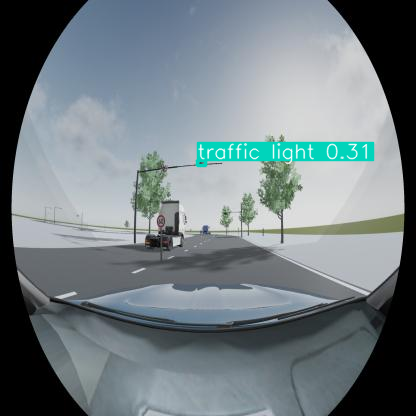

In [5]:
# Use a pretrained YOLOv8n model
model = YOLO("yolov8n.pt") 

# Use the model to detect object
image = "/kaggle/input/cardetection/car/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg"
result_predict = model.predict(source = image, imgsz=(416))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

## <b>5 <span style='color:#e61227'>|</span> YOLOv8-Based Traffic Signs Detection Model</b>
<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227''>5.1 |</span></b> Model Training Using Customized Dataset Of Traffic Signs </b></p>
</div>
        
***Mean Average Precision (mAP)*** is a metric used to evaluate the effectiveness of object detection algorithms in identifying and locating objects within images. It takes into account both precision and recall across different categories. By calculating the Average Precision (AP) for each category and taking the average, mAP provides an overall assessment of the algorithm's performance.

If the obtained mAP after the final epoch is not satisfactory, there are several options available to improve the results:
- Extending the training process by increasing the number of **epochs**: Training for more epochs allows the model to learn more patterns and potentially improve its performance. You can specify a higher value for the --epochs argument when running the training command.
- Experimenting with different **parameter values**: You can try adjusting various parameters to see if they have a positive impact on the results. Some parameters to consider are:
- **Batch Size:** Changing the batch size can affect the convergence and generalization of the model. You can modify the --batch-size argument to find an optimal value.
- **Initial Learning Rate (lr0)**: The initial learning rate determines the step size at the beginning of the training process. You can tune the --lr0 parameter to control how quickly the model learns.
- **Learning Rate Range (lrf)**: The learning rate range determines the range of learning rates used during the training. Experimenting with different values for --lrf can help find a better learning rate schedule.
- **Selecting a different optimizer**: The optimizer is responsible for updating the model's parameters based on the calculated gradients. Changing the optimizer can sometimes lead to better convergence and results. Ultralytics YOLOv8 supports different optimizers such as SGD, Adam, and RMSprop. You can try using a different optimizer by modifying the --optimizer argument.

For more details on resuming interrupted trainings and additional training options, you can refer to the Ultralytics YOLOv8 documentation.
        
In order to optimize the performance of the model, we have conducted experiments with different parameter values and optimizers. During the training phase, I explored various combinations of epochs, batch sizes, initial learning rates (lr0), and dropout values. The following values were used for experimentation:

- Epochs: ***10***, ***50***, ***100***
- Batch sizes: ***8***, ***16***, ***32***, ***64***
- Initial learning rates (lr0): ***0.001***, ***0.0003***, ***0.0001***
- Dropout: ***0.15***, ***0.25***

Furthermore, we have evaluated the model's performance using different optimizers, including **Adam**, **SGD**, and **auto**. By employing these optimizers, we aimed to assess their impact on the model's convergence and overall results.

After rigorous experimentation and training, we are pleased to present the results of our findings. The performance of the YOLOv8 model was assessed based on various metrics, including Mean Average Precision (mAP). 


***5.1.1. Training Step***

In [6]:
# Build from YAML and transfer weights
Final_model = YOLO('yolov8n.yaml').load('yolov8n.pt')  

# Training The Final Model
Result_Final_model = Final_model.train(data="/kaggle/input/cardetection/car/data.yaml",epochs=100, imgsz = 416, batch = 64 ,lr0=0.0001, dropout= 0.15, device = 0)



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

100%|██████████| 755k/755k [00:00<00:00, 13.3MB/s]


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/input/cardetection/car/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:18<00:00, 188.94it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/cardetection/car/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/cardetection/car/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:04<00:00, 174.89it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/cardetection/car/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.87G     0.8538      3.488        1.1         18        416: 100%|██████████| 56/56 [00:28<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.32it/s]

                   all        801        944     0.0479      0.803      0.142      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.89G     0.7229      2.319      1.017         29        416: 100%|██████████| 56/56 [00:23<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


                   all        801        944      0.265       0.46      0.292      0.246

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.88G     0.7187      1.959          1         23        416: 100%|██████████| 56/56 [00:23<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


                   all        801        944       0.35      0.442      0.367      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.88G     0.7155      1.728     0.9985         17        416: 100%|██████████| 56/56 [00:23<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]


                   all        801        944      0.537       0.57      0.574       0.47

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.88G     0.6912      1.507      0.985         16        416: 100%|██████████| 56/56 [00:23<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]


                   all        801        944      0.676      0.592      0.655      0.539

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.87G     0.6676      1.353     0.9743         18        416: 100%|██████████| 56/56 [00:23<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


                   all        801        944      0.634      0.656      0.691      0.579

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.87G     0.6569      1.229     0.9711         21        416: 100%|██████████| 56/56 [00:24<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]

                   all        801        944      0.781      0.667      0.749      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.85G     0.6494      1.151     0.9571         25        416: 100%|██████████| 56/56 [00:24<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


                   all        801        944      0.822      0.677      0.776      0.661

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.87G     0.6298      1.091     0.9583         26        416: 100%|██████████| 56/56 [00:23<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


                   all        801        944      0.843      0.747      0.817      0.691

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.87G     0.6262      1.002     0.9503         25        416: 100%|██████████| 56/56 [00:23<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]


                   all        801        944      0.839      0.738      0.824      0.695

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.87G     0.6209     0.9629     0.9493         21        416: 100%|██████████| 56/56 [00:24<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

                   all        801        944      0.841      0.762      0.831      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.87G     0.6077     0.9264     0.9445         20        416: 100%|██████████| 56/56 [00:23<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]


                   all        801        944      0.835      0.753      0.828      0.706

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.88G     0.6211     0.9028     0.9494         30        416: 100%|██████████| 56/56 [00:23<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]


                   all        801        944      0.819      0.786      0.835       0.71

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.87G      0.595      0.882     0.9418         19        416: 100%|██████████| 56/56 [00:24<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]


                   all        801        944      0.867       0.77      0.858      0.719

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.87G     0.6135     0.8461     0.9453         25        416: 100%|██████████| 56/56 [00:24<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

                   all        801        944      0.851      0.781      0.847       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.88G     0.6025     0.8397     0.9419         26        416: 100%|██████████| 56/56 [00:23<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        801        944       0.88      0.815      0.869      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.87G     0.5914     0.8044     0.9402         23        416: 100%|██████████| 56/56 [00:23<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


                   all        801        944      0.918      0.792      0.868      0.739

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.88G     0.5901     0.7919     0.9315         23        416: 100%|██████████| 56/56 [00:23<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]


                   all        801        944      0.919        0.8       0.87      0.745

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.87G     0.5821     0.7626     0.9322         28        416: 100%|██████████| 56/56 [00:23<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


                   all        801        944      0.945      0.809      0.892      0.766

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.87G      0.587     0.7516     0.9354         19        416: 100%|██████████| 56/56 [00:23<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]

                   all        801        944      0.898      0.795      0.881      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.87G     0.5733     0.7393     0.9321         22        416: 100%|██████████| 56/56 [00:23<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]


                   all        801        944      0.915      0.814      0.893      0.767

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.88G     0.5796     0.7393     0.9349         20        416: 100%|██████████| 56/56 [00:23<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]


                   all        801        944      0.906      0.786      0.871      0.747

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.87G     0.5714     0.7163     0.9294         21        416: 100%|██████████| 56/56 [00:23<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]


                   all        801        944      0.947      0.814      0.898      0.766

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.87G     0.5783     0.7169     0.9333         23        416: 100%|██████████| 56/56 [00:24<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]

                   all        801        944      0.895      0.802      0.884      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.88G     0.5679     0.7235     0.9323         20        416: 100%|██████████| 56/56 [00:23<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]

                   all        801        944      0.911      0.809      0.882      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.87G     0.5596     0.6801     0.9286         17        416: 100%|██████████| 56/56 [00:23<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

                   all        801        944      0.943      0.816      0.895      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.85G     0.5556     0.6706     0.9246         17        416: 100%|██████████| 56/56 [00:23<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


                   all        801        944      0.942      0.819      0.901      0.771

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.88G     0.5561      0.675     0.9287         19        416: 100%|██████████| 56/56 [00:23<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]

                   all        801        944      0.948      0.835      0.907      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.88G      0.551     0.6656     0.9229         26        416: 100%|██████████| 56/56 [00:23<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]


                   all        801        944      0.945       0.83      0.903      0.779

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.88G       0.56     0.6537      0.928         11        416: 100%|██████████| 56/56 [00:23<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]


                   all        801        944      0.928      0.817      0.889      0.766

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.89G     0.5569     0.6586     0.9277         21        416: 100%|██████████| 56/56 [00:23<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]

                   all        801        944       0.93      0.854      0.912      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.88G     0.5549     0.6548     0.9262         20        416: 100%|██████████| 56/56 [00:24<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]

                   all        801        944      0.922      0.855      0.907      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.88G     0.5526     0.6557     0.9288         21        416: 100%|██████████| 56/56 [00:23<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]

                   all        801        944      0.935      0.838       0.91      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.87G     0.5549     0.6304     0.9231         13        416: 100%|██████████| 56/56 [00:24<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]

                   all        801        944      0.943      0.845      0.912      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.86G     0.5408      0.619      0.922         26        416: 100%|██████████| 56/56 [00:23<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        801        944      0.919      0.843      0.906      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.85G     0.5382     0.6067     0.9188         21        416: 100%|██████████| 56/56 [00:23<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]

                   all        801        944      0.933      0.863      0.918      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.88G     0.5398     0.5987     0.9198         20        416: 100%|██████████| 56/56 [00:23<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

                   all        801        944      0.945      0.832      0.912      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.85G     0.5416     0.6063     0.9237         20        416: 100%|██████████| 56/56 [00:23<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


                   all        801        944      0.941      0.845      0.915      0.783

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.88G     0.5432     0.6006      0.921         23        416: 100%|██████████| 56/56 [00:23<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]

                   all        801        944      0.908      0.853      0.915       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.88G      0.538     0.6041     0.9212         23        416: 100%|██████████| 56/56 [00:23<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

                   all        801        944      0.923      0.852      0.917       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.88G     0.5338     0.5833     0.9173         25        416: 100%|██████████| 56/56 [00:23<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]

                   all        801        944      0.956      0.853      0.921      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.88G     0.5263     0.5896      0.921         18        416: 100%|██████████| 56/56 [00:24<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]

                   all        801        944      0.939       0.85       0.92      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.87G     0.5338     0.5865     0.9203         17        416: 100%|██████████| 56/56 [00:24<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]

                   all        801        944      0.956      0.848       0.92      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.89G     0.5283     0.5788     0.9179         26        416: 100%|██████████| 56/56 [00:23<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        801        944      0.959      0.857      0.921      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.87G     0.5322     0.5941     0.9182         21        416: 100%|██████████| 56/56 [00:23<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]

                   all        801        944      0.942      0.851      0.918      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.88G     0.5318     0.5837      0.918         21        416: 100%|██████████| 56/56 [00:23<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]


                   all        801        944      0.946      0.829        0.9      0.777

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.88G     0.5261      0.556     0.9156         23        416: 100%|██████████| 56/56 [00:23<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]

                   all        801        944      0.951      0.842      0.911      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.87G     0.5254     0.5732     0.9206         26        416: 100%|██████████| 56/56 [00:23<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]

                   all        801        944      0.923      0.872       0.92      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.88G     0.5167      0.542     0.9094         20        416: 100%|██████████| 56/56 [00:23<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]


                   all        801        944      0.966      0.854      0.921      0.798

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.87G     0.5158      0.545     0.9144         16        416: 100%|██████████| 56/56 [00:23<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]

                   all        801        944       0.95      0.859      0.921      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.88G     0.5199      0.551     0.9118         27        416: 100%|██████████| 56/56 [00:24<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


                   all        801        944      0.947      0.851      0.922      0.807

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.88G      0.512     0.5522     0.9127         21        416: 100%|██████████| 56/56 [00:23<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]

                   all        801        944      0.961      0.855      0.925      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.87G     0.5074      0.554     0.9126         22        416: 100%|██████████| 56/56 [00:24<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]

                   all        801        944      0.939      0.867      0.927      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.88G     0.5091     0.5203     0.9098         27        416: 100%|██████████| 56/56 [00:23<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]

                   all        801        944       0.95      0.867       0.93      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.88G     0.5116     0.5375     0.9125         27        416: 100%|██████████| 56/56 [00:23<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]

                   all        801        944      0.936      0.858      0.922      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.88G     0.5135     0.5233     0.9134         27        416: 100%|██████████| 56/56 [00:23<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]


                   all        801        944      0.952      0.872      0.923      0.801

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.88G     0.5039     0.5298     0.9063         20        416: 100%|██████████| 56/56 [00:23<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]

                   all        801        944      0.965      0.853      0.926      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.88G     0.4995     0.5246     0.9082         21        416: 100%|██████████| 56/56 [00:23<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]

                   all        801        944      0.947      0.838      0.928      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.85G     0.5139     0.5227     0.9101         23        416: 100%|██████████| 56/56 [00:23<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]


                   all        801        944      0.964      0.845      0.928      0.807

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.88G     0.5071     0.5319      0.911         18        416: 100%|██████████| 56/56 [00:23<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]


                   all        801        944      0.937      0.859      0.926      0.807

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.88G      0.505     0.5069     0.9064         19        416: 100%|██████████| 56/56 [00:23<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]

                   all        801        944      0.936      0.864      0.925      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.87G     0.4959     0.4995     0.9051         27        416: 100%|██████████| 56/56 [00:23<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]

                   all        801        944      0.928      0.881       0.93      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.87G     0.4934      0.503     0.9043         20        416: 100%|██████████| 56/56 [00:24<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]

                   all        801        944      0.941      0.875      0.931      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.88G      0.507     0.5108      0.909         25        416: 100%|██████████| 56/56 [00:23<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]

                   all        801        944      0.939      0.879      0.934      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.88G     0.5061     0.4928     0.9064         20        416: 100%|██████████| 56/56 [00:23<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


                   all        801        944      0.969      0.878      0.933      0.812

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.88G     0.4908      0.497     0.9049         22        416: 100%|██████████| 56/56 [00:23<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]

                   all        801        944      0.942      0.889      0.933      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.88G     0.5044     0.5006     0.9078         25        416: 100%|██████████| 56/56 [00:23<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]


                   all        801        944      0.955      0.877      0.928       0.81

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.88G     0.4931     0.4961     0.9063         22        416: 100%|██████████| 56/56 [00:23<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]


                   all        801        944      0.953      0.872      0.926      0.806

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.87G      0.491     0.4862     0.9064         26        416: 100%|██████████| 56/56 [00:23<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]


                   all        801        944      0.953      0.873      0.935      0.816

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.88G     0.4941     0.4847     0.9035         22        416: 100%|██████████| 56/56 [00:24<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]

                   all        801        944      0.952      0.879      0.933      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.86G     0.4813     0.4758     0.9041         21        416: 100%|██████████| 56/56 [00:23<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]

                   all        801        944      0.935      0.887      0.935      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.85G     0.4836     0.4667     0.8989         28        416: 100%|██████████| 56/56 [00:24<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


                   all        801        944      0.922      0.886       0.93      0.809

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.87G     0.4739     0.4661     0.9026         25        416: 100%|██████████| 56/56 [00:24<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]


                   all        801        944      0.916      0.899      0.933      0.815

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.87G     0.4841     0.4791     0.9055         19        416: 100%|██████████| 56/56 [00:24<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


                   all        801        944      0.937      0.881      0.933      0.813

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.87G     0.4799     0.4593     0.9009         25        416: 100%|██████████| 56/56 [00:24<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        801        944      0.937      0.868      0.931      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.88G      0.482     0.4631     0.9036         26        416: 100%|██████████| 56/56 [00:24<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


                   all        801        944      0.954       0.88      0.931      0.812

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.88G     0.4769      0.464     0.9021         21        416: 100%|██████████| 56/56 [00:25<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]

                   all        801        944      0.951      0.867      0.928      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.89G     0.4752      0.467     0.8995         25        416: 100%|██████████| 56/56 [00:24<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]

                   all        801        944       0.96      0.862      0.927      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.88G     0.4694     0.4535      0.899         20        416: 100%|██████████| 56/56 [00:24<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

                   all        801        944      0.967      0.874      0.939      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.87G     0.4693     0.4493     0.9016         29        416: 100%|██████████| 56/56 [00:24<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]


                   all        801        944      0.938      0.885       0.93      0.818

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.89G     0.4774     0.4519     0.8962         26        416: 100%|██████████| 56/56 [00:23<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]

                   all        801        944      0.955      0.876      0.933      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.87G     0.4673     0.4462     0.8977         17        416: 100%|██████████| 56/56 [00:23<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

                   all        801        944      0.944      0.896      0.939      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.88G     0.4733     0.4449     0.8988         23        416: 100%|██████████| 56/56 [00:24<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]


                   all        801        944       0.95      0.888      0.932      0.818

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.87G     0.4611     0.4312     0.8994         33        416: 100%|██████████| 56/56 [00:24<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

                   all        801        944       0.96      0.869      0.932      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.88G     0.4648     0.4504     0.8966         24        416: 100%|██████████| 56/56 [00:24<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]

                   all        801        944      0.968      0.867      0.932      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.88G     0.4607     0.4245     0.8979         25        416: 100%|██████████| 56/56 [00:23<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]

                   all        801        944      0.948      0.883      0.936      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.88G     0.4606     0.4366     0.8965         27        416: 100%|██████████| 56/56 [00:23<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


                   all        801        944      0.951      0.882      0.932      0.818

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.88G     0.4566     0.4298     0.8989         15        416: 100%|██████████| 56/56 [00:24<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]


                   all        801        944      0.941      0.885      0.934      0.824

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.87G     0.4498     0.4165     0.8978         20        416: 100%|██████████| 56/56 [00:24<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]


                   all        801        944       0.95      0.871      0.932       0.82

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.87G     0.4546     0.4151     0.8929         19        416: 100%|██████████| 56/56 [00:23<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


                   all        801        944      0.957      0.883      0.936      0.824
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      3.87G     0.4501     0.2769     0.8447         12        416: 100%|██████████| 56/56 [00:24<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

                   all        801        944      0.957      0.886      0.938      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.87G     0.4426     0.2721     0.8472         12        416: 100%|██████████| 56/56 [00:21<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]

                   all        801        944      0.956      0.872      0.937      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.87G     0.4376     0.2706      0.845         12        416: 100%|██████████| 56/56 [00:21<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]

                   all        801        944       0.95      0.881      0.939      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      3.87G     0.4406     0.2621     0.8448         14        416: 100%|██████████| 56/56 [00:21<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]

                   all        801        944      0.957      0.882      0.937      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      3.87G     0.4318     0.2595     0.8455         10        416: 100%|██████████| 56/56 [00:22<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]


                   all        801        944      0.949      0.886      0.938      0.825

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      3.87G     0.4405      0.263     0.8461         15        416: 100%|██████████| 56/56 [00:21<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]

                   all        801        944      0.949      0.888      0.936      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      3.87G     0.4267      0.254     0.8442         12        416: 100%|██████████| 56/56 [00:22<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]


                   all        801        944      0.954      0.886      0.936      0.824

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      3.87G     0.4265     0.2541     0.8365         10        416: 100%|██████████| 56/56 [00:21<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

                   all        801        944       0.95      0.886      0.935      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      3.87G     0.4314     0.2553     0.8413         10        416: 100%|██████████| 56/56 [00:21<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]


                   all        801        944      0.951      0.889      0.938      0.823

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      3.87G     0.4293     0.2574     0.8378         11        416: 100%|██████████| 56/56 [00:22<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]


                   all        801        944       0.95      0.887      0.937      0.823

100 epochs completed in 0.800 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.219 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.20it/s]


                   all        801        944      0.949      0.888      0.936      0.826
           Green Light        801        122      0.864      0.689      0.769      0.478
             Red Light        801        108      0.895       0.63      0.766      0.473
       Speed Limit 100        801         52      0.961      0.936      0.985      0.914
       Speed Limit 110        801         17      0.846      0.882      0.942      0.873
       Speed Limit 120        801         60      0.983      0.976      0.991      0.917
        Speed Limit 20        801         56          1      0.976      0.987      0.886
        Speed Limit 30        801         74      0.908      0.973      0.985       0.92
        Speed Limit 40        801         55      0.965      0.945      0.979      0.893
        Speed Limit 50        801         71      0.984      0.887      0.951      0.851
        Speed Limit 60        801         76      0.946      0.917      0.956      0.885
        Speed Limit 7

***5.1.2. Validation Step***

In [19]:
list_of_metrics = ["P_curve.png","R_curve.png","confusion_matrix.png"]

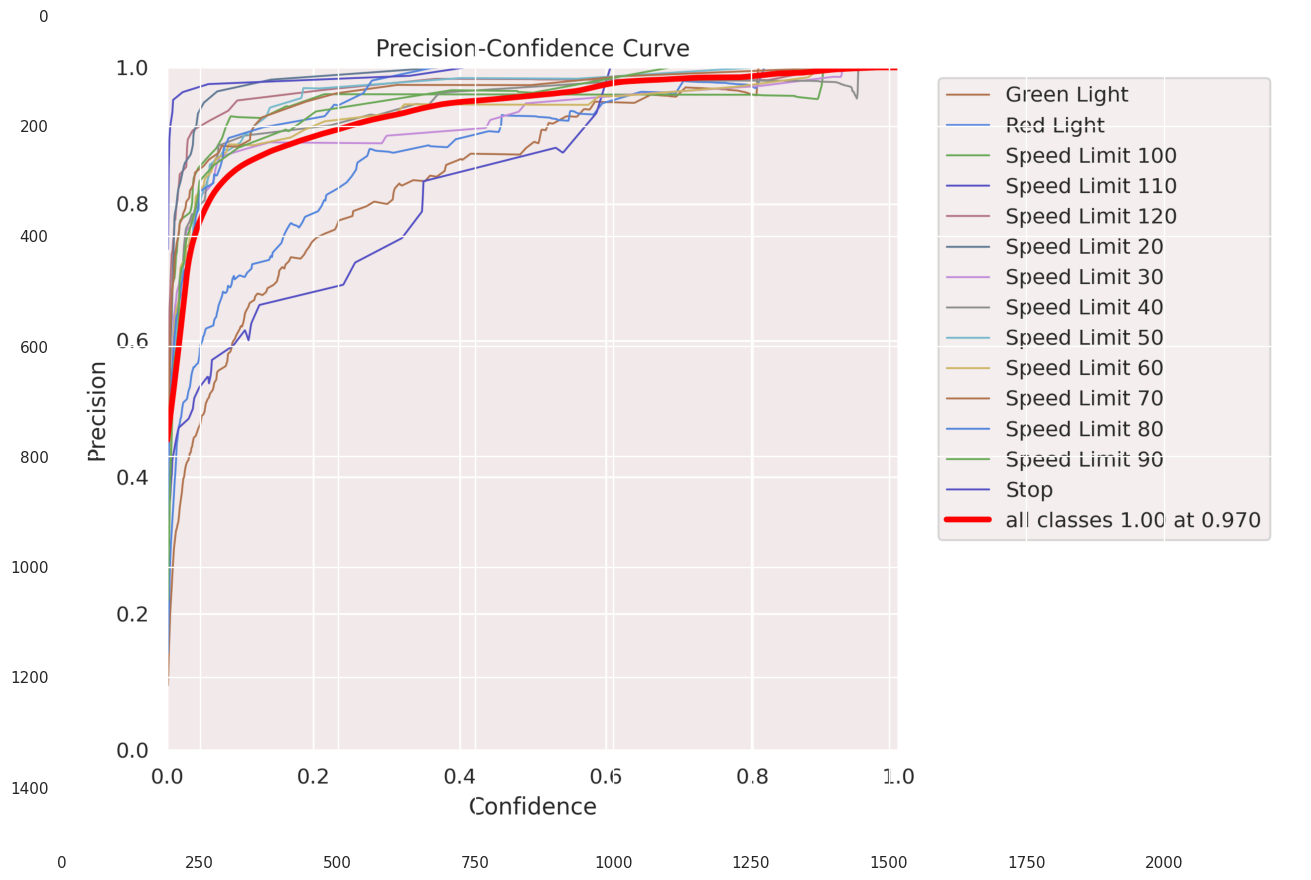

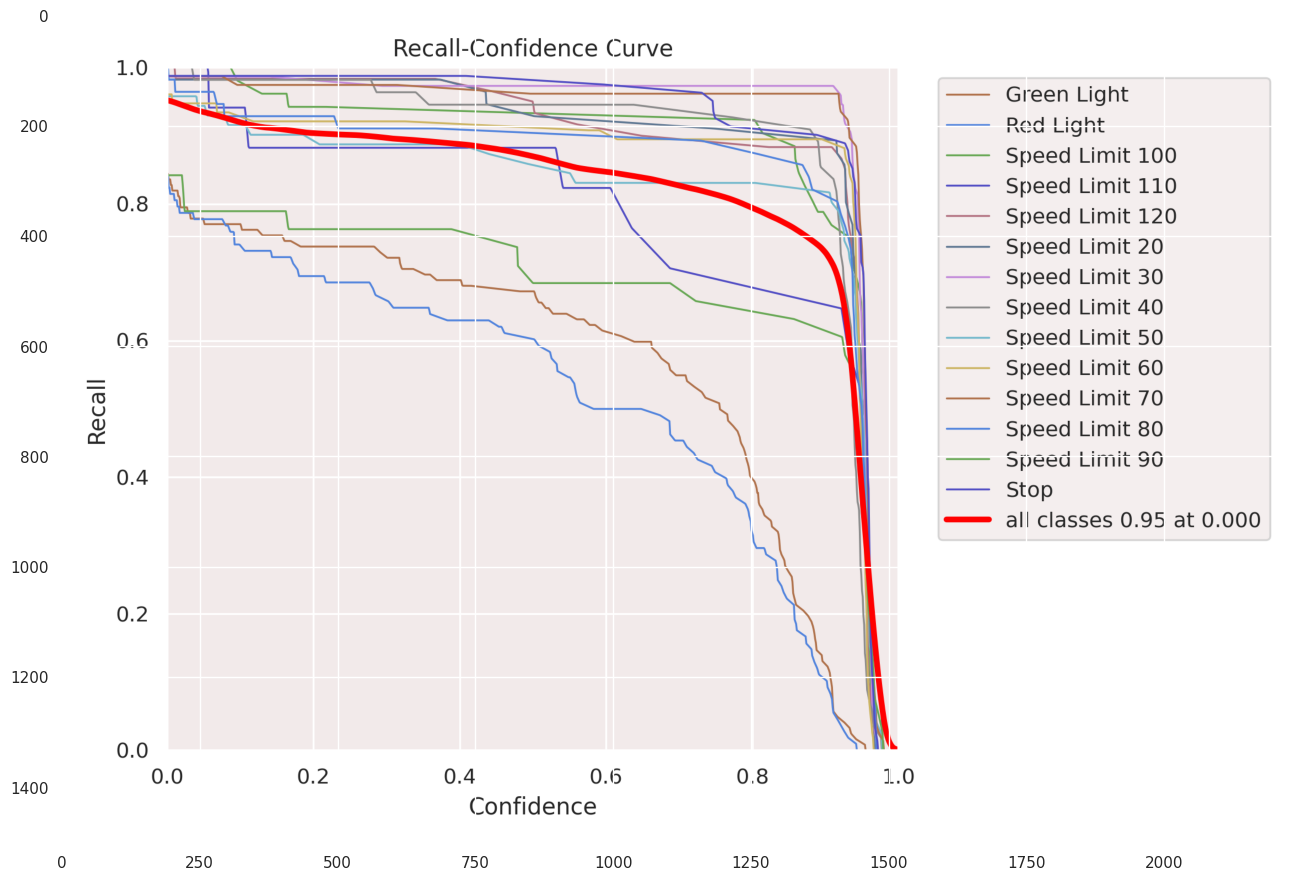

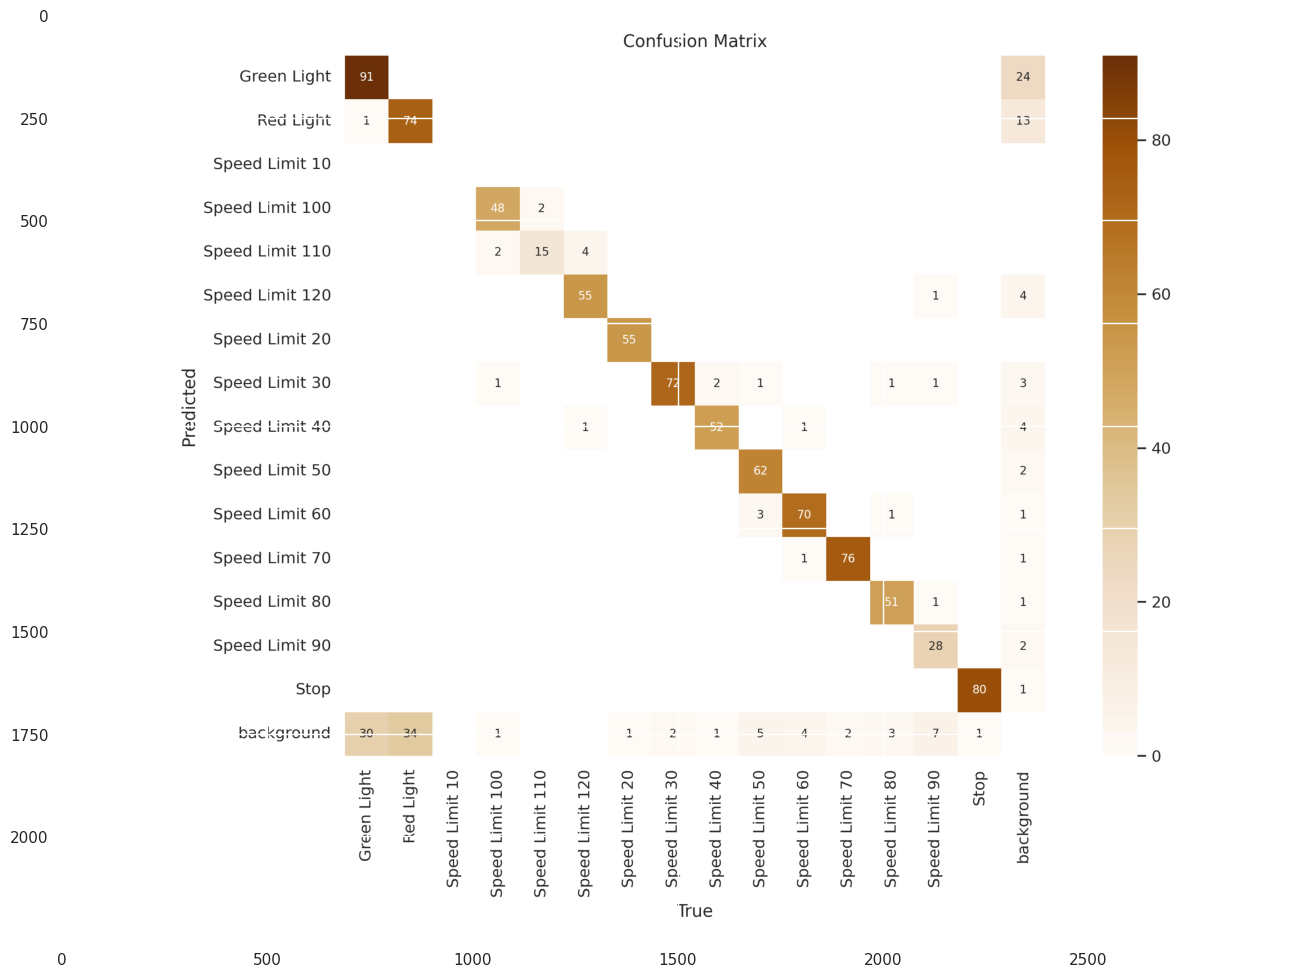

In [21]:
# Load the image
for i in list_of_metrics:
    image = cv2.imread(f'/kaggle/working/runs/detect/train/{i}')

    # Create a larger figure
    plt.figure(figsize=(16, 12))

    # Display the image
    plt.imshow(image)

    # Show the plot
    plt.show()

In [7]:
Result_Final_model = pd.read_csv('/kaggle/working/runs/detect/train/results.csv')
Result_Final_model.tail(10)

epoch           train/box_loss           train/cls_loss  \
90                       91                  0.45006                  0.27691   
91                       92                  0.44258                  0.27213   
92                       93                  0.43758                  0.27056   
93                       94                  0.44064                  0.26209   
94                       95                  0.43180                  0.25948   
95                       96                  0.44046                  0.26304   
96                       97                  0.42667                  0.25397   
97                       98                  0.42651                  0.25408   
98                       99                  0.43141                  0.25529   
99                      100                  0.42934                  0.25742   

             train/dfl_loss     metrics/precision(B)        metrics/recall(B)  \
90                  0.84474                  0.95741                  0.88584   
91                  0.84718                  0.95556                  0.87158   
92                  0.84501                  0.94971                  0.88145   
93                  0.84477                  0.95747                  0.88220   
94                  0.84551                  0.94949                  0.88595   
95                  0.84614                  0.94937                  0.88843   
96                  0.84423                  0.95410                  0.88641   
97                  0.83650                  0.95040                  0.88575   
98                  0.84128                  0.95139                  0.88868   
99                  0.83780                  0.94992                  0.88743   

           metrics/mAP50(B)      metrics/mAP50-95(B)             val/box_loss  \
90                  0.93815                  0.82551                  0.49904   
91                  0.93679                  0.82207                  0.49956   
92                  0.93892                  0.82307                  0.50472   
93                  0.93678                  0.82269                  0.50354   
94                  0.93780                  0.82549                  0.50496   
95                  0.93616                  0.82581                  0.50213   
96                  0.93580                  0.82374                  0.50103   
97                  0.93522                  0.82334                  0.50117   
98                  0.93801                  0.82292                  0.50056   
99                  0.93698                  0.82323                  0.49943   

               val/cls_loss             val/dfl_loss                   lr/pg0  \
90                  0.28778                  0.86309                 0.000063   
91                  0.28141                  0.86213                 0.000057   
92                  0.28676                  0.86531                 0.000052   
93                  0.28608                  0.86449                 0.000047   
94                  0.28107                  0.86636                 0.000042   
95                  0.28464                  0.86474                 0.000037   
96                  0.28601                  0.86503                 0.000031   
97                  0.28855                  0.86634                 0.000026   
98                  0.28795                  0.86579                 0.000021   
99                  0.28454                  0.86544                 0.000016   

                     lr/pg1                   lr/pg2  
90                 0.000063                 0.000063  
91                 0.000057                 0.000057  
92                 0.000052                 0.000052  
93                 0.000047                 0.000047  
94                 0.000042                 0.000042  
95                 0.000037                 0.000037  
96                 0.000031                 0.000031  
97            

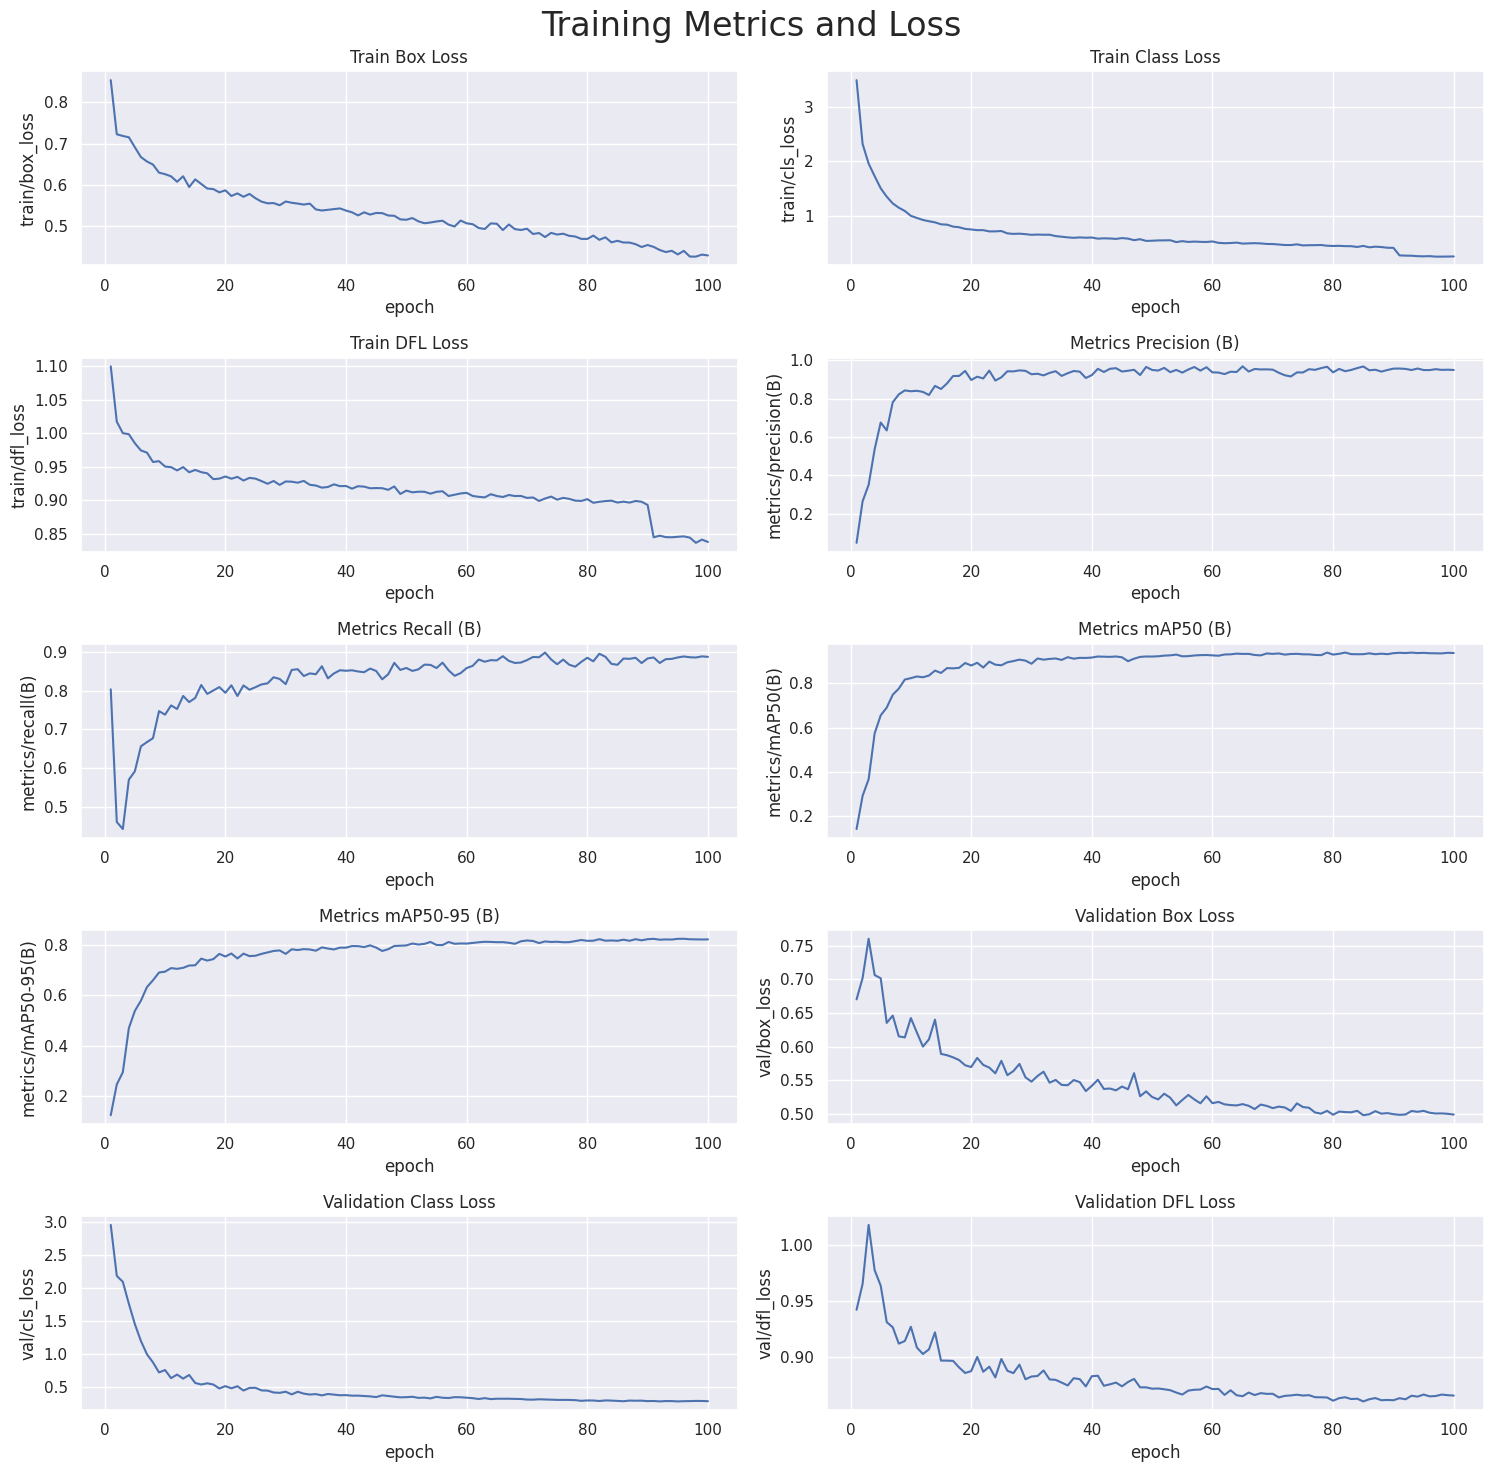

In [25]:
# Read the results.csv file as a pandas dataframe
Result_Final_model.columns = df.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227''>5.2 |</span></b> Validation of the Model By TestSet </b></p>
</div>

In [26]:
# Loading the best performing model
Valid_model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

# Evaluating the model on the testset
metrics = Valid_model.val(split = 'test')

Ultralytics YOLOv8.0.219 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/input/cardetection/car/test/labels... 638 images, 1 backgrounds, 0 corrupt: 100%|██████████| 638/638 [00:04<00:00, 136.56it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/cardetection/car/test is not writeable, cache not saved.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:04<00:00,  8.54it/s]


                   all        638        770      0.926      0.863      0.933      0.804
           Green Light        638        110      0.913      0.755      0.874      0.513
             Red Light        638         94      0.874      0.589      0.713      0.458
        Speed Limit 10        638          3      0.755      0.667      0.913      0.724
       Speed Limit 100        638         46      0.936      0.949      0.985      0.878
       Speed Limit 110        638         21      0.964       0.81      0.881      0.777
       Speed Limit 120        638         44      0.936      0.977      0.983      0.893
        Speed Limit 20        638         46      0.946      0.957      0.978        0.9
        Speed Limit 30        638         60      0.935      0.883      0.943      0.884
        Speed Limit 40        638         53      0.939      0.962      0.983      0.879
        Speed Limit 50        638         50      0.879       0.88      0.916      0.828
        Speed Limit 6

In [30]:
# final results 
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

precision(B):  0.9262265797867028
metrics/recall(B):  0.8627182732862867
metrics/mAP50(B):  0.9325493491265877
metrics/mAP50-95(B):  0.8036311592479929


**Tip: Based on the observed results, it is evident that the accuracy of the model on both the validation and test data sets exhibits a high degree of similarity. This outcome serves as an indication that the model has been appropriately trained.**

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227''>5.3 |</span></b> Making Predictions On Test Images </b></p>
</div>

In [31]:
# Path to the directory containing the images
image_dir = '/kaggle/input/cardetection/car/test/images'  

# Get a list of all image files in the directory
image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith('.jpg')]

# Randomly select 10 images from the directory
random_images = random.sample(image_files, k=10)

for image_path in random_images:
    image = cv2.imread(image_path)  # Replace with your preferred method of reading the image
    results = Final_model.predict([image], save=True, imgsz=416, conf=0.5, iou=0.7)
    #results.append(result)


0: 416x416 1 Green Light, 6.7ms
Speed: 3.5ms preprocess, 6.7ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train2

0: 416x416 1 Green Light, 6.2ms
Speed: 1.3ms preprocess, 6.2ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train3

0: 416x416 1 Speed Limit 20, 6.2ms
Speed: 0.7ms preprocess, 6.2ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train4

0: 416x416 1 Speed Limit 80, 6.2ms
Speed: 1.1ms preprocess, 6.2ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train5

0: 416x416 1 Green Light, 6.3ms
Speed: 0.9ms preprocess, 6.3ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train6

0: 416x416 1 Speed Limit 80, 6.1ms
Speed: 1.0ms preprocess, 6.1ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train7



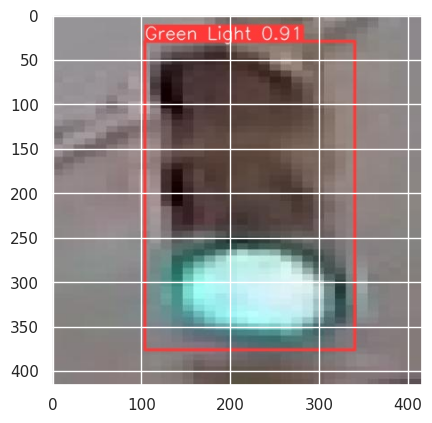

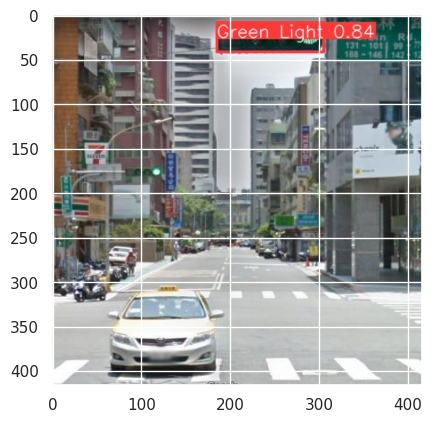

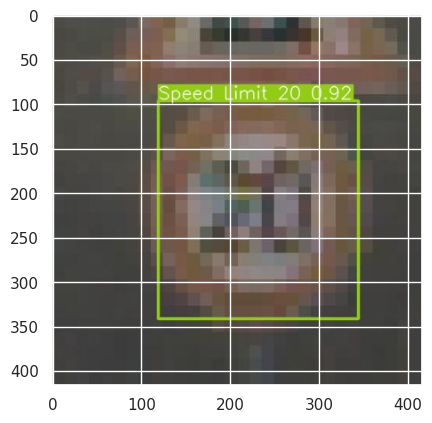

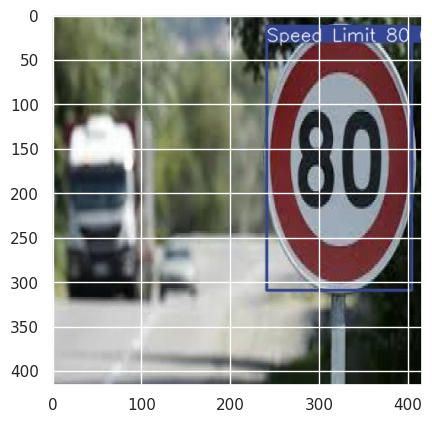

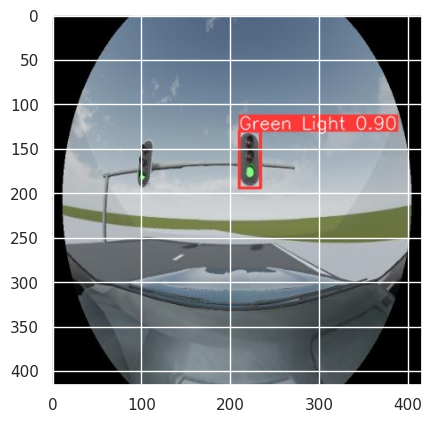

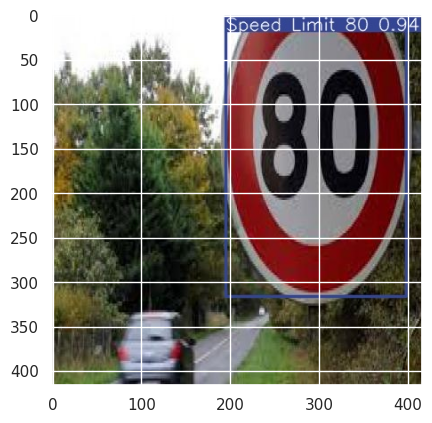

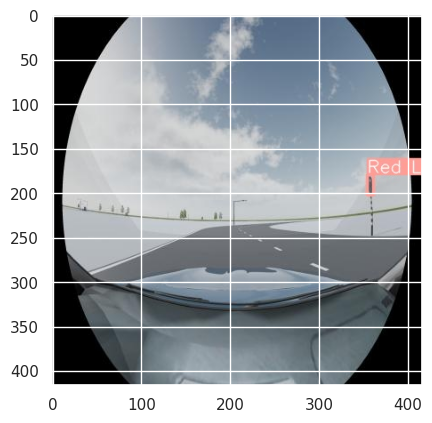

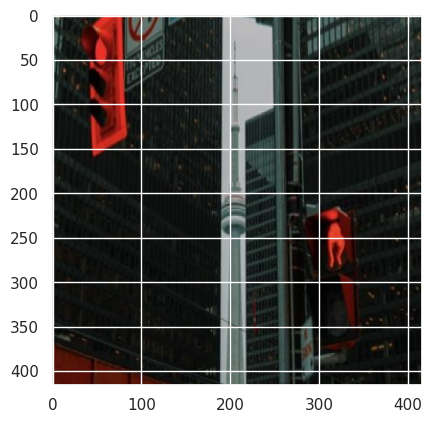

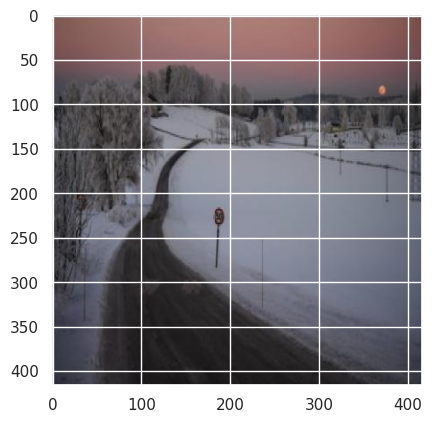

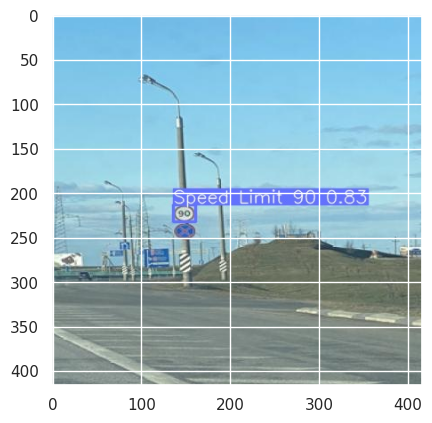

In [32]:
# View results
for i in range(2,12):
    plt.imshow(plt.imread(f'/kaggle/working/runs/detect/train{i}/image0.jpg'))
    plt.show()

## <b>6 <span style='color:#e61227'>|</span> Export The Final Model Of Detect Traffic Signs </b>

**Tip:** The ultimate goal of training a model is to deploy it for real-world applications. Export mode in Ultralytics YOLOv8 offers a versatile range of options for exporting your trained model to different formats, making it deployable across various platforms and devices.

In [37]:
# Export the model
video_model.export(format='onnx')

Ultralytics YOLOv8.0.219 🚀 Python-3.10.12 torch-2.0.0 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'yolov8n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (6.2 MB)

ONNX: starting export with onnx 1.14.1 opset 17...
================ Diagnostic Run torch.onnx.export version 2.0.0 ================
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

ONNX: export success ✅ 1.0s, saved as 'yolov8n.onnx' (12.2 MB)

Export complete (2.9s)
Results saved to /kaggle/working
Predict:         yolo predict task=detect model=yolov8n.onnx imgsz=640  
Validate:        yolo val task=detect model=yolov8n.onnx imgsz=640 data=coco.yaml  
Visualize:       https://netron.app


'yolov8n.onnx'

## <b>7 <span style='color:#e61227'>|</span> Try Pre-trained YOLOv8 For Detect Traffic Signs From Video  </b>
<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>7.1 |</span></b> Show Original Video Before Detect </b></p>
</div>

**Tip: Due to the substantial volume of the video generated from the image dataset, I have to utilize only a truncated segment of the original video for this project.**

In [33]:
# Convert mp4
!ffmpeg -y -loglevel panic -i /kaggle/input/cardetection/video.mp4 output.mp4

# Display the video
Video("output.mp4", width=960)

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>7.2 |</span></b> Predict By Pr-Trained YOLOv8 </b></p>
</div>

In [35]:
# Load a pr-trained model
video_model = YOLO("yolov8n.pt")
 
# Use the model to detect signs
video_model.predict(source="/kaggle/input/cardetection/video.mp4", show=True, save = True)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/508) /kaggle/input/cardetection/video.mp4: 640x640 1 stop sign, 7.9ms
video 1/1 (2/508) /kaggle/input/cardetection/video.mp4: 640x640 1 stop sign, 7.8ms
video 1/1 (3/508) /kaggle/input/cardetection/video.mp4: 640x640 1 stop sign, 7.8ms
video 1/1 (4/508) /kaggle/input/cardetection/video.mp4: 640x640 (no detections), 7.8ms
video 1/1 (5/508) /kaggle/input/cardetection/v

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [36]:
# show result
# Convert format
!ffmpeg -y -loglevel panic -i /kaggle/working/runs/detect/predict/video.avi result_out.mp4

# Display the video 
Video("result_out.mp4", width=960)


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'></span></b> Thank you for taking the time to review my notebook. If you have any questions or criticisms, please kindly let me know in the comments section.  </b></p>
</div>
